# Distracted Driver Detection 

## Deep Learning at Scale - Image Classification using AutoML

The project uses image classification to predict the likelihood of driver behaviour in an image. There are 10 possible classes in which an image can be classified:
- c0: safe driving
- c1: texting - right
- c2: talking on the phone - right
- c3: texting - left
- c4: talking on the phone - left
- c5: operating the radio
- c6: drinking
- c7: reaching behind
- c8: hair and makeup
- c9: talking to passenger

A dataset of driver images, each taken in a car with a driver performing some activity in the car (texting, eating, talking on the phone, hair/makeup, reaching behind, etc) is used to train the image classification model.

A convolutional neural network (CNN) was developed in Keras on Tensorflow backend to classify driver images. To train a model with a larger image dataset, the dataset was uploaded to a Google Cloud Platform (GCP) bucket and the AutoML Vision API (Beta) on GCP was used to train a model.

### Images
The State Farm Distracted Driver dataset from Kaggle, consisting of 22,424 images, was used to train the model. The screenshot below of the AutoML Vision console shows a subset of the image dataset along with a list of the number of images under each label.

<img src="AutoML1_Dataset.png">

### Model Evaluation
The screenshots below are of the generated model evaluation, showing a precision of 100% and recall of 99.73%. The confusion matrix generated by GCP has also been included.

<img src="AutoML3_Evaluate1.png">

<img src="AutoML3_Evaluate2.png">

<img src="AutoML3_Evaluate3.png">

### Testing the Model
The model is currently hosted on GCP. The Python code for making predictions using this model was provided by GCP and is included below, along with predictions on unlabeled test images to demonstrate model accuracy.

In [1]:
import sys
from IPython.display import Image
from google.cloud import automl_v1beta1
from google.cloud.automl_v1beta1.proto import service_pb2

In [2]:
#define class labels
class_dict = {'c0':'driving safely', 'c1':'texting - right', 'c2': 'talking on the phone - right', 'c3': 'texting - left',
'c4': 'talking on the phone - left', 'c5': 'operating the radio', 'c6': 'drinking',
'c7': 'reaching behind', 'c8': 'doing hair or makeup', 'c9': 'talking to passenger'}

#define GCP model parameters
project_id = ''#<<insert project-id>>
model_id = '' #<<insert model-id>>

In [3]:
def get_prediction(content, project_id, model_id):
  prediction_client = automl_v1beta1.PredictionServiceClient()

  name = 'projects/{}/locations/us-central1/models/{}'.format(project_id, model_id)
  payload = {'image': {'image_bytes': content }}
  params = {}
  request = prediction_client.predict(name, payload, params)
  return request  # waits till request is returned

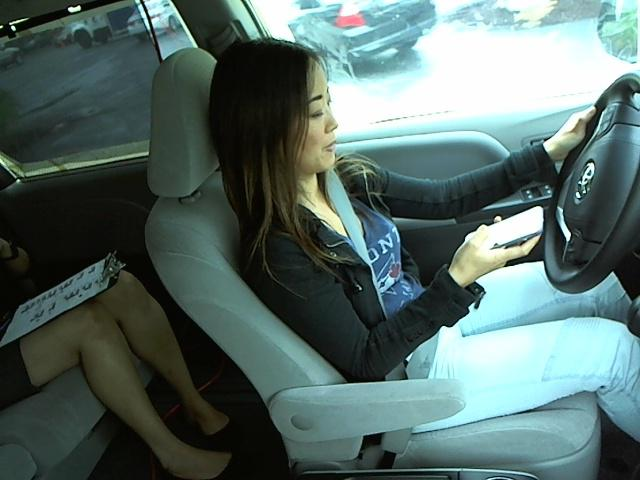

In [4]:
file_path = 'TestImages/img_62597.jpg'
Image(filename=file_path) 

In [5]:
#read image from file
with open(file_path, 'rb') as ff:
    content = ff.read()
    
#get prediction from model
pred = get_prediction(content, project_id,  model_id)
print (pred)
#translate "display_name" to the class of distracted driver
print("Subject in image is classified as", class_dict[pred.payload[0].display_name])

payload {
  classification {
    score: 0.7560589909553528
  }
  display_name: "c1"
}

Subject in image is classified as texting - right


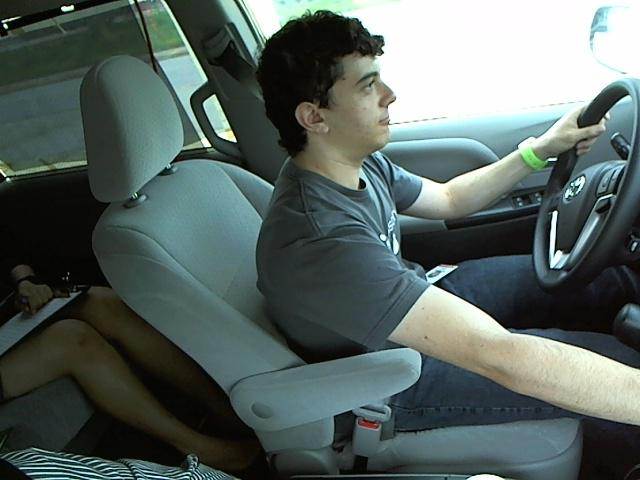

In [6]:
file_path = 'TestImages/img_62599.jpg'
Image(filename=file_path) 

In [7]:
with open(file_path, 'rb') as ff:
    content = ff.read()
pred = get_prediction(content, project_id,  model_id)
print (pred)
#translate "display_name" to the class of distracted driver
print("Subject in image is classified as", class_dict[pred.payload[0].display_name])

payload {
  classification {
    score: 0.8931000232696533
  }
  display_name: "c5"
}

Subject in image is classified as operating the radio


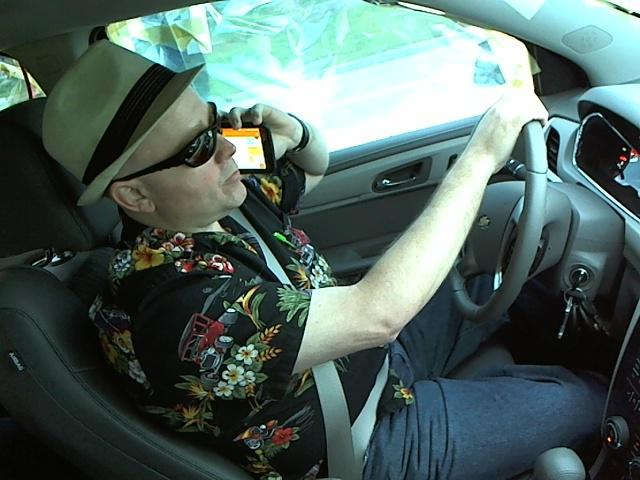

In [8]:
file_path = 'TestImages/img_62600.jpg'
Image(filename=file_path)

In [9]:
with open(file_path, 'rb') as ff:
    content = ff.read()

pred = get_prediction(content, project_id,  model_id)
print (pred)
#translate "display_name" to the class of distracted driver
print("Subject in image is classified as", class_dict[pred.payload[0].display_name])

payload {
  classification {
    score: 0.5490009784698486
  }
  display_name: "c4"
}

Subject in image is classified as talking on the phone - left


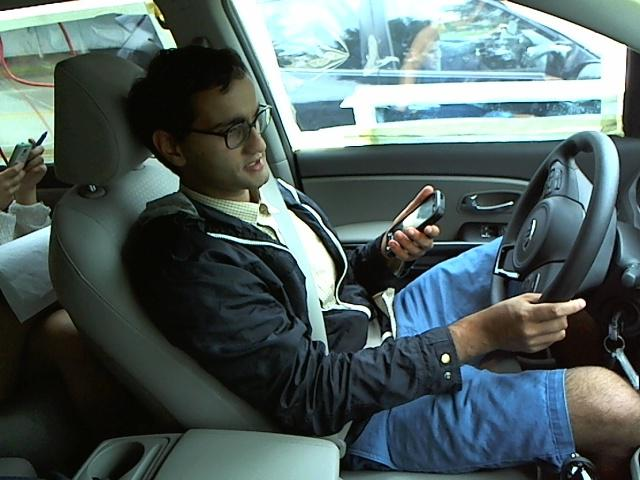

In [10]:
file_path = 'TestImages/img_62602.jpg'
Image(filename=file_path)

In [11]:
with open(file_path, 'rb') as ff:
    content = ff.read()

pred = get_prediction(content, project_id,  model_id)
print (pred)
#translate "display_name" to the class of distracted driver
print("Subject in image is classified as", class_dict[pred.payload[0].display_name])

payload {
  classification {
    score: 0.9275469779968262
  }
  display_name: "c3"
}

Subject in image is classified as texting - left


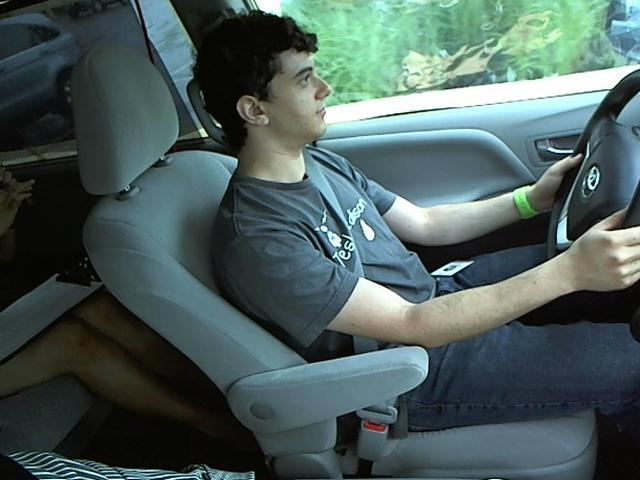

In [12]:
file_path = 'TestImages/img_62605.jpg'
Image(filename=file_path)

In [13]:
with open(file_path, 'rb') as ff:
    content = ff.read()

pred = get_prediction(content, project_id,  model_id)
print (pred)
#translate "display_name" to the class of distracted driver
print("Subject in image is classified as", class_dict[pred.payload[0].display_name])

payload {
  classification {
    score: 0.5016109943389893
  }
  display_name: "c0"
}

Subject in image is classified as driving safely


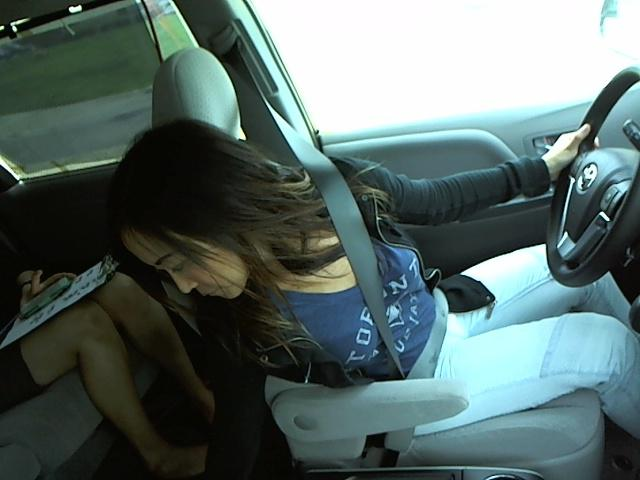

In [14]:
file_path = 'TestImages/img_57347.jpg'
Image(filename=file_path)

In [15]:
with open(file_path, 'rb') as ff:
    content = ff.read()

pred = get_prediction(content, project_id,  model_id)
print (pred)
#translate "display_name" to the class of distracted driver
print("Subject in image is classified as", class_dict[pred.payload[0].display_name])

payload {
  classification {
    score: 0.827564001083374
  }
  display_name: "c7"
}

Subject in image is classified as reaching behind


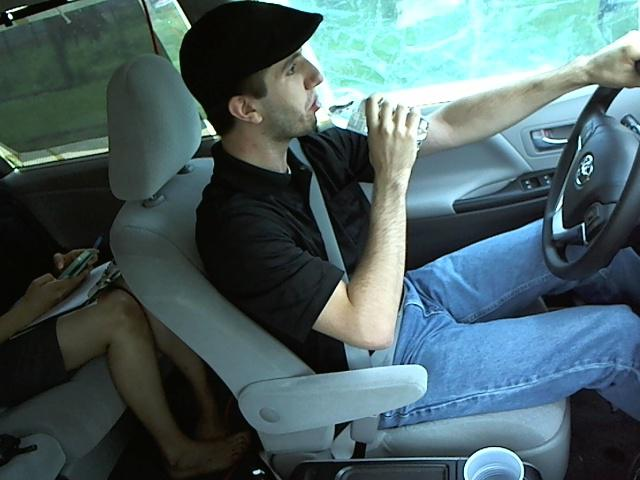

In [16]:
file_path = 'TestImages/img_57349.jpg'
Image(filename=file_path)

In [17]:
with open(file_path, 'rb') as ff:
    content = ff.read()

pred = get_prediction(content, project_id,  model_id)
print (pred)
#translate "display_name" to the class of distracted driver
print("Subject in image is classified as", class_dict[pred.payload[0].display_name])

payload {
  classification {
    score: 0.8964279890060425
  }
  display_name: "c6"
}

Subject in image is classified as drinking


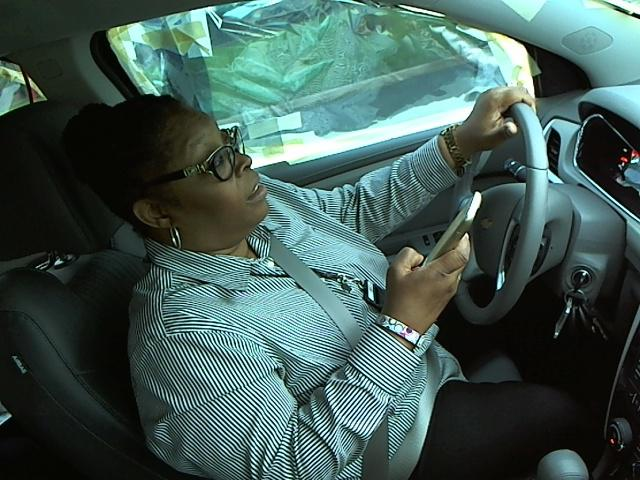

In [19]:
file_path = 'TestImages/img_57350.jpg'
Image(filename=file_path)

In [20]:
with open(file_path, 'rb') as ff:
    content = ff.read()

pred = get_prediction(content, project_id,  model_id)
print (pred)
#translate "display_name" to the class of distracted driver
print("Subject in image is classified as", class_dict[pred.payload[0].display_name])

payload {
  classification {
    score: 0.8855059742927551
  }
  display_name: "c1"
}

Subject in image is classified as texting - right


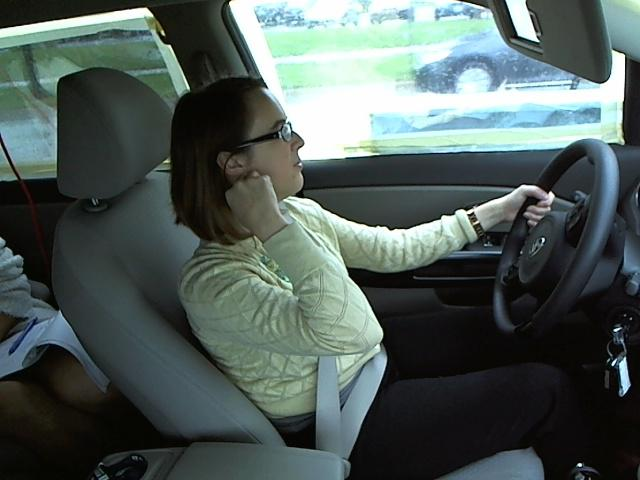

In [21]:
file_path = 'TestImages/img_787.jpg'
Image(filename=file_path)

In [22]:
with open(file_path, 'rb') as ff:
    content = ff.read()

pred = get_prediction(content, project_id,  model_id)
print (pred)
#translate "display_name" to the class of distracted driver
print("Subject in image is classified as", class_dict[pred.payload[0].display_name])

payload {
  classification {
    score: 0.8643190264701843
  }
  display_name: "c8"
}

Subject in image is classified as doing hair or makeup


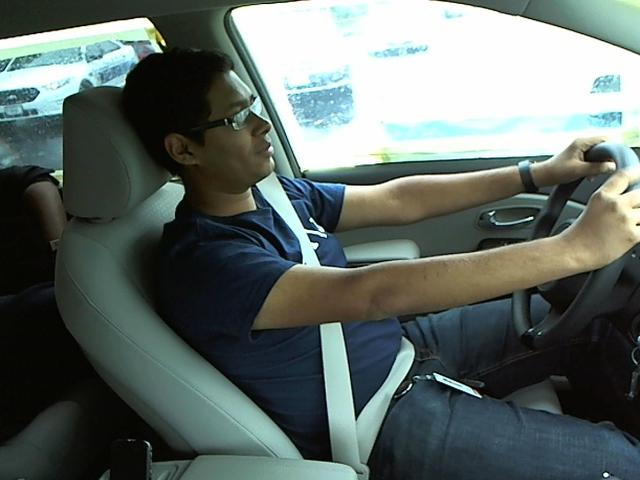

In [23]:
file_path = 'TestImages/img_903.jpg'
Image(filename=file_path)

In [24]:
with open(file_path, 'rb') as ff:
    content = ff.read()

pred = get_prediction(content, project_id,  model_id)
print (pred)
#translate "display_name" to the class of distracted driver
print("Subject in image is classified as", class_dict[pred.payload[0].display_name])

payload {
  classification {
    score: 0.7965850234031677
  }
  display_name: "c0"
}

Subject in image is classified as driving safely
